# This section is for first model, A model which predicts the maximum daily energy usage based on the provided weather data. Before writing any code, we discussed about our thoughts. The questions were:

#### 1- which variables should have correlation with demand?
the answers were: temperature and sunshine
#### 2- what do you think our scatter plot should be based on variable based on previous question? 
for temperature should increase as temperature going to minimum or maximum and less sunshine should lead to increase demand.
Let’s see our prediction:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loading our DataFrame
result = pd.read_csv('result.csv') 

##### for all columns with continues data (float and integer) we use scatter plot and Pearson correlation:

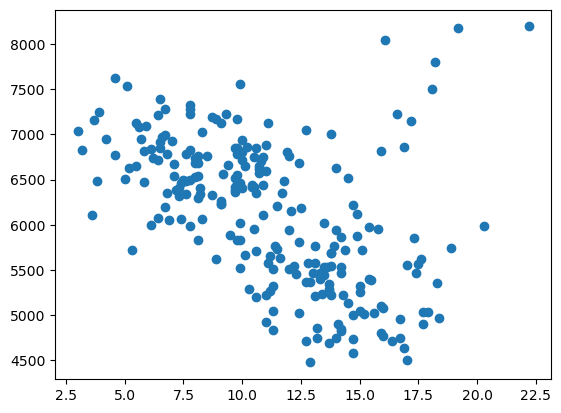

Pearson r for Minimum temperature (°C) and Max_Demand is  -0.4829170321902499


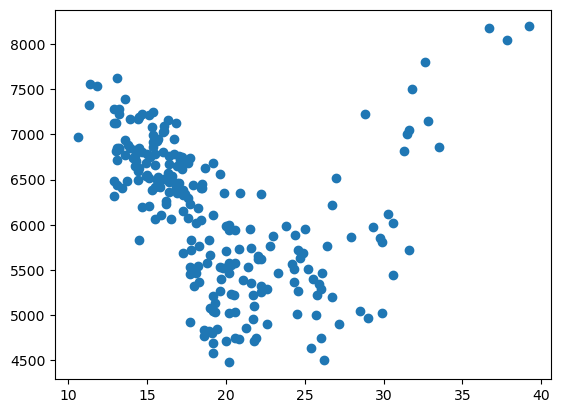

Pearson r for Maximum temperature (°C) and Max_Demand is  -0.2787024324856696


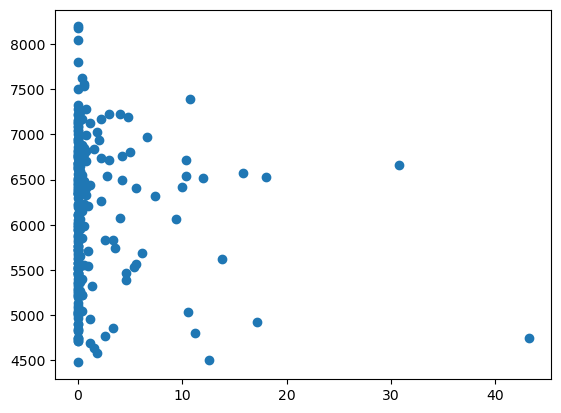

Pearson r for Rainfall (mm) and Max_Demand is  -0.0701800503023311


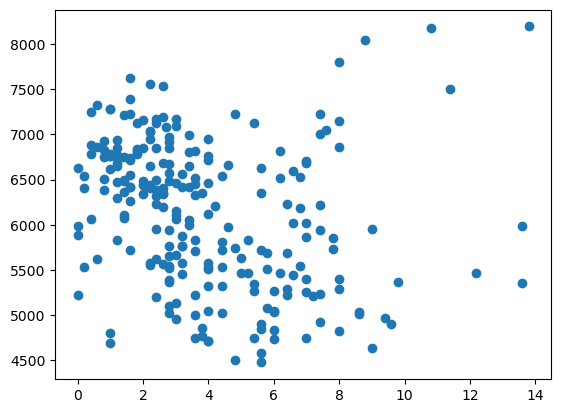

Pearson r for Evaporation (mm) and Max_Demand is  -0.24058345179672


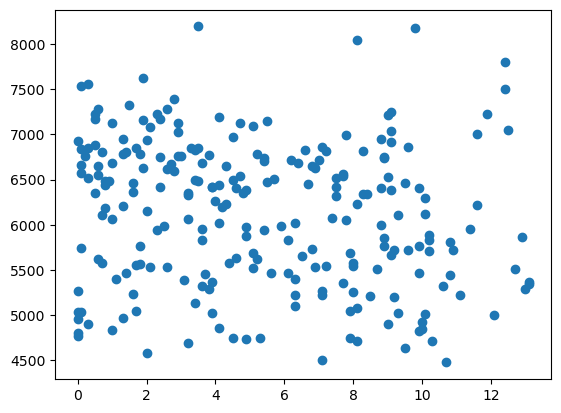

Pearson r for Sunshine (hours) and Max_Demand is  -0.1615137770463744


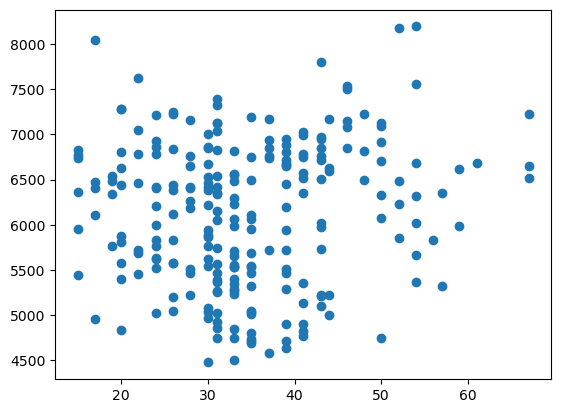

Pearson r for Speed of maximum wind gust (km/h) and Max_Demand is  0.10915564884517165


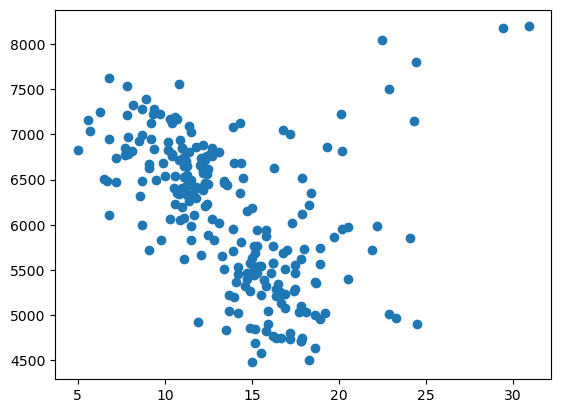

Pearson r for 9am Temperature (°C) and Max_Demand is  -0.375774499573087


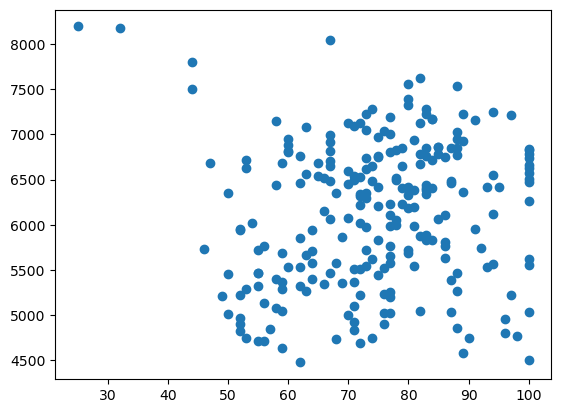

Pearson r for 9am relative humidity (%) and Max_Demand is  0.08601816151768922


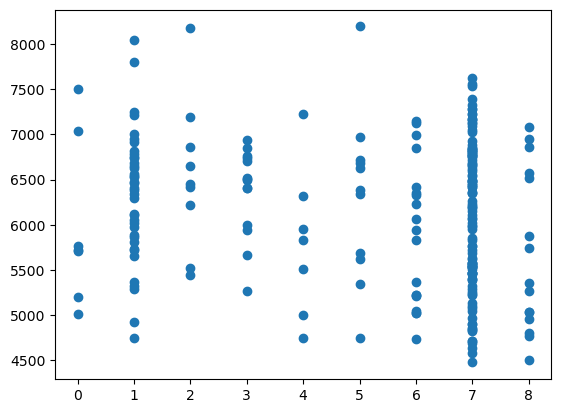

Pearson r for 9am cloud amount (oktas) and Max_Demand is  -0.14985141491960405


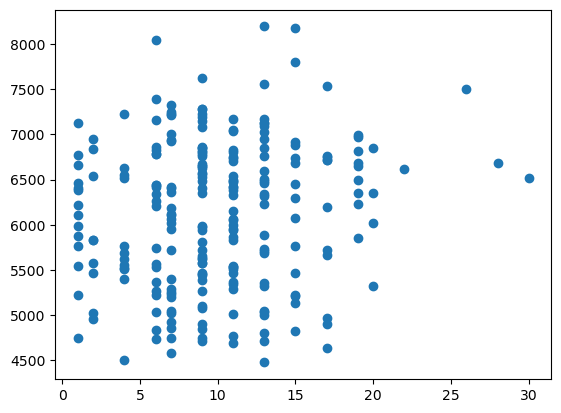

Pearson r for 9am wind speed (km/h) and Max_Demand is  0.14130523323838146


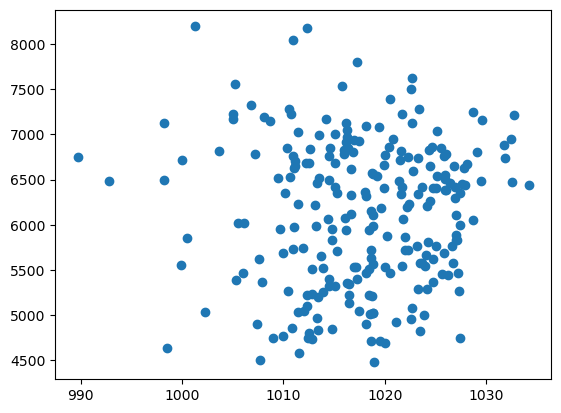

Pearson r for 9am MSL pressure (hPa) and Max_Demand is  0.03649754316524864


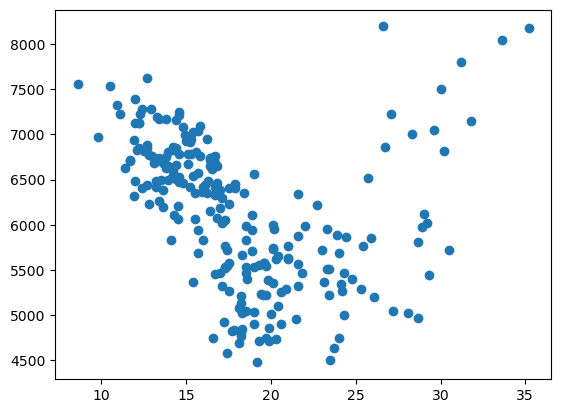

Pearson r for 3pm Temperature (°C) and Max_Demand is  -0.30701246985285396


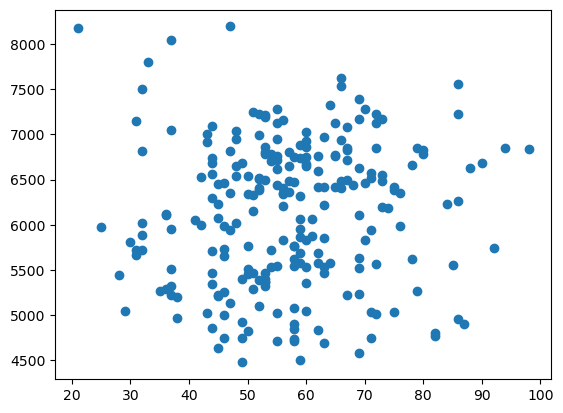

Pearson r for 3pm relative humidity (%) and Max_Demand is  0.0645719580361232


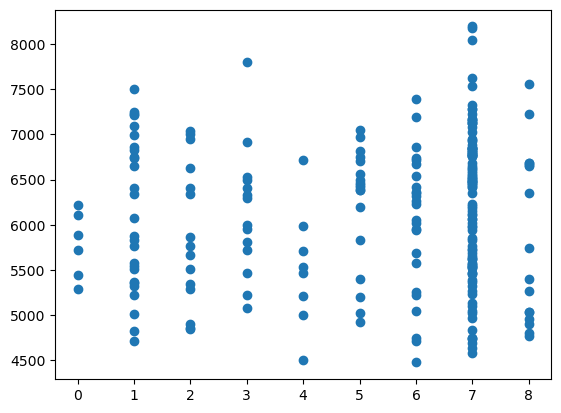

Pearson r for 3pm cloud amount (oktas) and Max_Demand is  0.0832328767887722


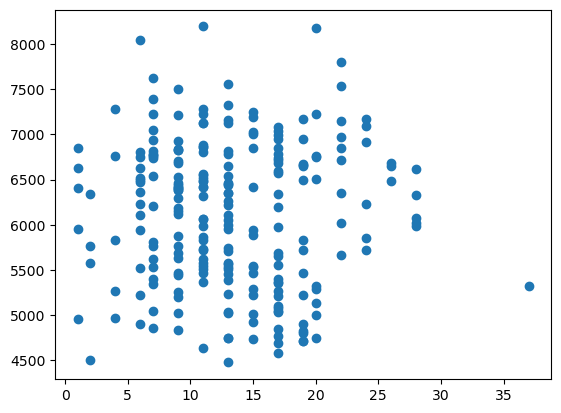

Pearson r for 3pm wind speed (km/h) and Max_Demand is  -0.012499460607943788


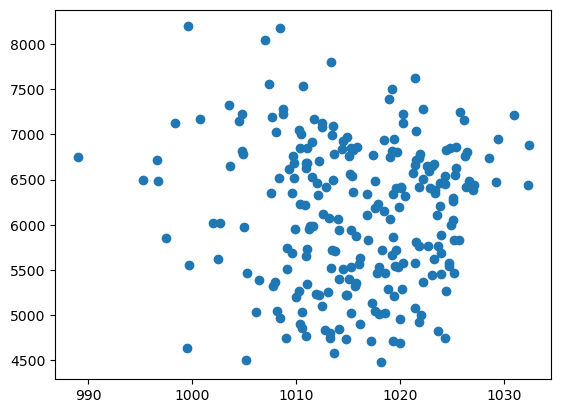

Pearson r for 3pm MSL pressure (hPa) and Max_Demand is  -0.018737272238024932


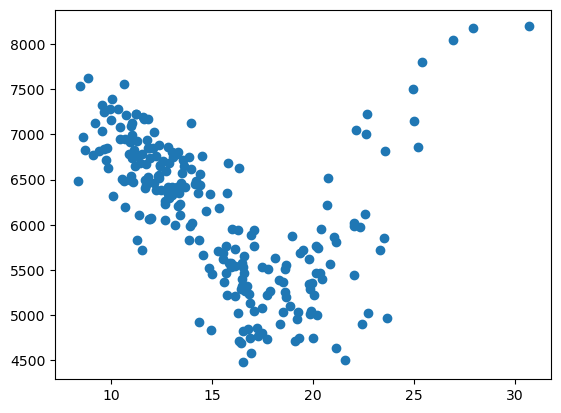

Pearson r for Average temperature (°C) and Max_Demand is  -0.39282894985092165


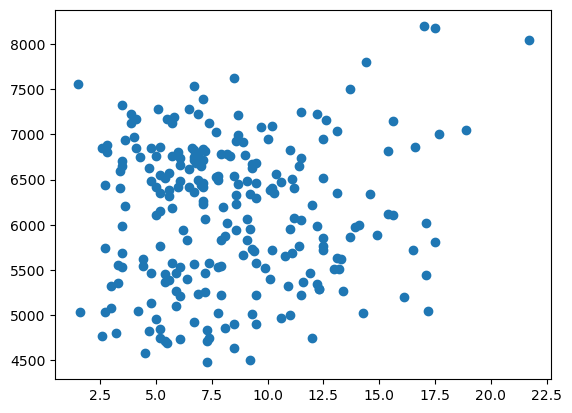

Pearson r for Temperature range (°C) and Max_Demand is  0.09028584926202923


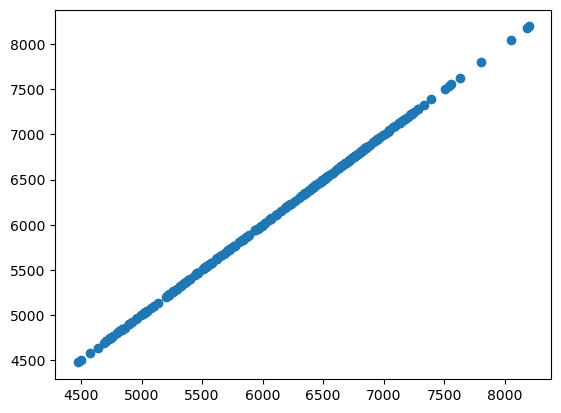

Pearson r for Max_Demand and Max_Demand is  1.0


In [3]:
# Use scatter plots for variables and Max_Dmand to find out any relation
for column in result:
    if result[column].dtypes == 'float64' or result[column].dtypes == 'int64' :
        plt.scatter(result[column],result['Max_Demand'])
        plt.show()

        print(f"Pearson r for {column} and Max_Demand is ",result[column].corr(result['Max_Demand']))

##### As we investigate the scatter graphs, we find out there is relation between temperature and demand. to not putting too much weight on temperature we used Average temperature for our model, before deciding about our model let's have a look at scatter graph:

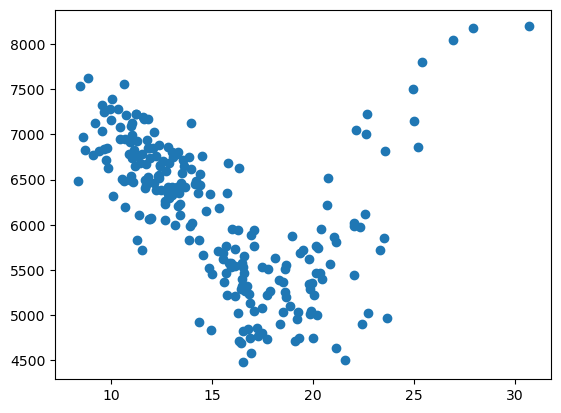

In [4]:
plt.scatter(result['Average temperature (°C)'],result['Max_Demand'])
plt.show()

In [5]:
# we should find a range of temperature for our model
result['Average temperature (°C)'].max() 

30.700000000000003

In [6]:
result['Average temperature (°C)'].min()

8.35

##### As we investigate the scatter graphs, we find out there is relation between temperature and demand. to not putting too much weight on temperature we used Average temperature for our model, before deciding about our model let's have a look at scatter graph:
##### As we see in the scatter there is a kind of parabola. We can define a temperature where is about minimum demand and have two linear model.
##### when we look at scatter it looks 19 degree is a proper point, so we will have two model for temperature in range (8,19) and [19,31)



#### It looks we must back to wrangling again:
we split our DataFrame based on temperature less than 19 and more than 19


In [7]:
# Split our DataFrame based on temperature for less than 19 (°C)
result1 = result.loc[result['Average temperature (°C)'] < 19]
result1.head()

Date  Minimum temperature (°C)  Maximum temperature (°C)  \
3    4/01/2021                      16.0                      18.6   
4    5/01/2021                      15.9                      19.1   
5    6/01/2021                      13.7                      19.2   
7    8/01/2021                      12.7                      24.3   
13  14/01/2021                      15.0                      22.2   

    Rainfall (mm)  Evaporation (mm)  Sunshine (hours)  \
3             2.6               3.8               0.0   
4            11.2               1.0               0.0   
5             1.2               1.0               3.2   
7             0.0               9.8              13.1   
13            0.0               7.0               8.0   

   Direction of maximum wind gust   Speed of maximum wind gust (km/h)  \
3                              SSE                               41.0   
4                              SSE                               35.0   
5                                S                               35.0   
7                              SSW                               31.0   
13                               W                               31.0   

   Time of maximum wind gust  9am Temperature (°C)  ...  3pm Temperature (°C)  \
3                      16:03                  16.2  ...                  18.2   
4                      11:02                  17.2  ...                  18.2   
5                      14:56                  15.2  ...                  18.1   
7                      15:04                  18.6  ...                  23.1   
13                     23:23                  16.6  ...                  20.6   

    3pm relative humidity (%) 3pm cloud amount (oktas)  3pm wind direction  \
3                          82                      8.0                 SSW   
4                          82                      8.0                 SSE   
5                          63                      7.0                 SSW   
7                          53                      1.0                 SSW   
13                         46                      6.0                 SSW   

    3pm wind speed (km/h)  3pm MSL pressure (hPa)  Average temperature (°C)  \
3                    17.0                  1011.0                     17.30   
4                    19.0                  1013.3                     17.50   
5                    17.0                  1020.0                     16.45   
7                    11.0                  1022.2                     18.50   
13                    9.0                  1013.1                     18.60   

    Temperature range (°C) Max_Demand  Max_Price_Category  
3                      2.6    4764.18                 LOW  
4                      3.2    4800.64                 LOW  
5                      5.5    4691.13                 LOW  
7                     11.6    5365.19              MEDIUM  
13                     7.2    5257.95              MEDIUM  

[5 rows x 25 columns]

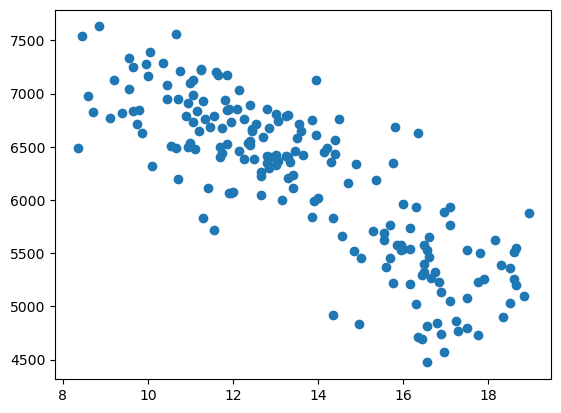

Pearson r is  -0.8296206327630037


In [8]:
# checking scatter plot and pearson r for new temperature range.

plt.scatter(result1['Average temperature (°C)'],result1['Max_Demand']) 
plt.show()

print("Pearson r is ",result1['Average temperature (°C)'].corr(result1['Max_Demand']))

##### That looks great when we split our model to two different model, we get -0.83 which is strongly linear. let's find our model for temperature in 
##### (8,19)



In [9]:
# Now we define our model
# Defining Variables and classlable for our model

X = result1[['Average temperature (°C)']]
Y = result1['Max_Demand']

# Allocate 80 percent of instances for training and rest for testing

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=40)

# fitting traing data

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# Test our model by testing data

y_test_predictions = lm.predict(X_test)
print(lm.coef_, lm.intercept_)
print(lm.score(X_test, y_test))
print(lm.score(X_train, y_train))


[-220.22760822] 9187.93565643241
0.6368676240807547
0.700478233310576


##### To find a better model and be able to evaluate our model performance we used 100 different random_state by using a for loop and then make an average for gradient and intercept for our model as well as evaluate our model based on average of r squared for training and test sets.

# Important note:
In previous workshop Daniel explained the code for cross validation and we should use it but because we discussed in our group about the method to find the best reliable model a few weeks ago, we decide to not change our code.


In [10]:
# Using for loop to define best model
# Defining Variables and classlable for our model

X = result1[['Average temperature (°C)']]
Y = result1['Max_Demand']


coef = []
intercept = []
r2_train = []
r2_test = []
for i in range(0,100):
    
    # Allocate 80 percent of instances for training and rest for testing

    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=i)
    
    # fitting traing data

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    
    # Test our model by testing data
    
    y_test_predictions = lm.predict(X_test)
    coef.append(lm.coef_)
    intercept.append(lm.intercept_)
    r2_test.append(lm.score(X_test, y_test))
    r2_train.append(lm.score(X_train, y_train))
print('r square for training set = ', sum(r2_train)/len(r2_train))
print('r square for testing set = ', sum(r2_test)/len(r2_test))
print(f'our model is Max_Demand = {sum(coef)/len(coef)} x Average temperature (°C) + {sum(intercept)/len(intercept)}' )

r square for training set =  0.686803560149947
r square for testing set =  0.6749955637014509
our model is Max_Demand = [-226.05981583] x Average temperature (°C) + 9277.050466450404


# It looks we got a good r square. However, if this model wants to be used for investing in power stations need to study more. Our model will be y = - 226.06 x 'Average temperature ' +9277.05 but this model is for x in range (8,19). When we have just one independent variable probably doesn’t need to scale our variable.

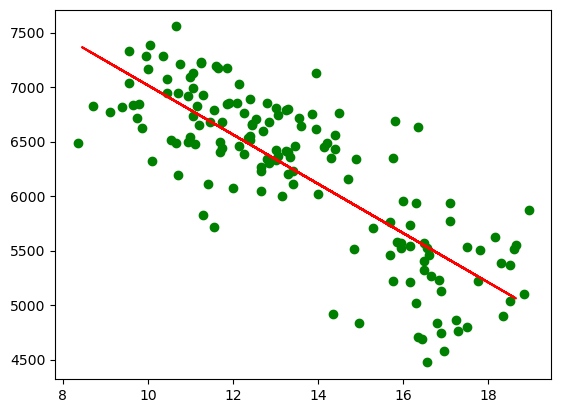

In [11]:
# plot actual point

plt.scatter(X_train, y_train,color='g') 

# plot our linear model

plt. plot(X_test,-226.05981583 * X_test + 9277.050466450404, color='r')

# As all of other variable doesn’t show any high correlation even sunshine which we thought might have effect, we decide to choose just Average temperature as independent variable.

## Now we will check the Residual
### first, we make a DataFrame and calculate Residual based on our model.
# This part is written before workshop which Daniel explained.


In [12]:
# DataFrame for low temperature range
Evaluation_low = pd.DataFrame(y_test)

In [13]:
# we re going to make a datafram for evaluation based on our model prediction and actual demand, we calculate residual and
# error percentage
Evaluation_low['Predict_Demand'] = -226.05981583 * X_test + 9277.050466450404 
Evaluation_low['residual'] = Evaluation_low['Predict_Demand'] - Evaluation_low['Max_Demand'] 
Evaluation_low['Error_percentage'] = Evaluation_low['residual']/Evaluation_low['Max_Demand']*100
Evaluation_low.head()

Max_Demand  Predict_Demand    residual  Error_percentage
98      5366.73     5750.517340  383.787340          7.151232
57      5197.76     5061.034901 -136.725099         -2.630462
232     7126.76     7197.300161   70.540161          0.989793
151     6421.12     6191.333980 -229.786020         -3.578597
86      5536.91     5660.093413  123.183413          2.224768

In [14]:
# adding average temperature
model_low_df = pd.merge(X_test,Evaluation_low, left_index=True,right_index=True, how='inner')

In [15]:
model_low_df.head()

Average temperature (°C)  Max_Demand  Predict_Demand    residual  \
98                      15.60     5366.73     5750.517340  383.787340   
57                      18.65     5197.76     5061.034901 -136.725099   
232                      9.20     7126.76     7197.300161   70.540161   
151                     13.65     6421.12     6191.333980 -229.786020   
86                      16.00     5536.91     5660.093413  123.183413   

     Error_percentage  
98           7.151232  
57          -2.630462  
232          0.989793  
151         -3.578597  
86           2.224768

#### Here is Residule for our model:

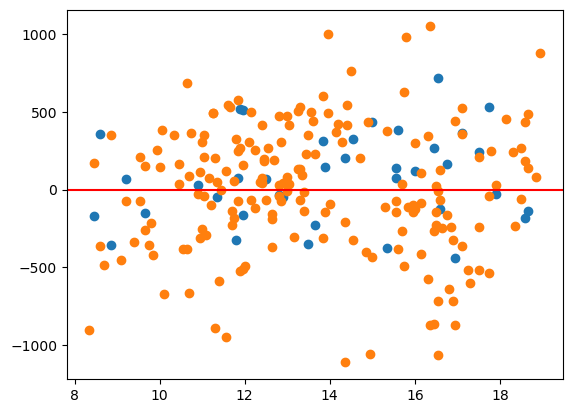

In [16]:
# Scatter plot for prediction(blue point) and other data
plt.scatter(model_low_df['Average temperature (°C)'],model_low_df['residual'])
plt.scatter(result1['Average temperature (°C)'],result1['Max_Demand'] + 226.05981583 * result1['Average temperature (°C)'] - 9277.050466450404)

plt.axhline(y=0, color='r', linestyle='-')
plt.show()




#### It looks randomly distributed through our domain (8,19)

##### let's check next model for temperature in range[19,31)

In [17]:
result2 = result.loc[result['Average temperature (°C)'] >= 19]
result2.head()

Date  Minimum temperature (°C)  Maximum temperature (°C)  \
0  1/01/2021                      15.6                      29.9   
1  2/01/2021                      18.4                      29.0   
2  3/01/2021                      17.0                      26.2   
6  7/01/2021                      14.7                      25.7   
8  9/01/2021                      14.2                      27.9   

   Rainfall (mm)  Evaporation (mm)  Sunshine (hours)  \
0            0.0               2.8               9.3   
1            0.0               9.4               1.3   
2           12.6               4.8               7.1   
6            0.0               3.6              12.1   
8            0.0               7.0              12.9   

  Direction of maximum wind gust   Speed of maximum wind gust (km/h)  \
0                             NNE                               31.0   
1                             NNW                               30.0   
2                             WSW                               33.0   
6                             SSE                               44.0   
8                             NNW                               30.0   

  Time of maximum wind gust  9am Temperature (°C)  ...  3pm Temperature (°C)  \
0                     13:14                  19.2  ...                  28.1   
1                      8:22                  23.3  ...                  28.7   
2                     17:55                  18.3  ...                  23.5   
6                     13:21                  18.6  ...                  24.3   
8                      9:46                  19.7  ...                  24.4   

   3pm relative humidity (%) 3pm cloud amount (oktas)  3pm wind direction  \
0                         43                      5.0                   E   
1                         38                      7.0                  SW   
2                         59                      4.0                 SSW   
6                         46                      4.0                 SSE   
8                         59                      2.0                 SSW   

   3pm wind speed (km/h)  3pm MSL pressure (hPa)  Average temperature (°C)  \
0                   13.0                  1015.3                     22.75   
1                    4.0                  1008.5                     23.70   
2                    2.0                  1005.2                     21.60   
6                   20.0                  1022.0                     20.20   
8                   11.0                  1019.3                     21.05   

   Temperature range (°C) Max_Demand  Max_Price_Category  
0                    14.3    5019.64                 LOW  
1                    10.6    4964.35                 LOW  
2                     9.2    4503.31                 LOW  
6                    11.0    4994.78                 LOW  
8                    13.7    5863.37              MEDIUM  

[5 rows x 25 columns]

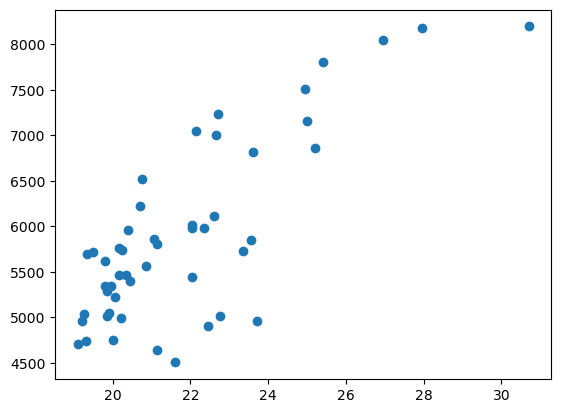

Pearson r is  0.78964135951396


In [18]:
plt.scatter(result2['Average temperature (°C)'],result2['Max_Demand'])
plt.show()

print("Pearson r is ",result2['Average temperature (°C)'].corr(result2['Max_Demand']))

##### It looks correlation is good let’s define our second model:

In [19]:
# Now we define our model
# Defining Variables and classlable for our model

X = result2[['Average temperature (°C)']]
Y = result2['Max_Demand']

# Allocate 80 percent of instances for training and rest for testing

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=1)

# fitting traing data

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# Test our model by testing data

y_test_predictions = lm.predict(X_test)
print(lm.coef_, lm.intercept_)
print(lm.score(X_test, y_test))
print(lm.score(X_train, y_train))


[292.2566635] -472.0117516835671
0.6391696735676369
0.6135538359973417


##### same as before we use a for loop to check our model performance and finding more accurate model

In [20]:
# Using for loop to define best model
# Defining Variables and classlable for our model

X = result2[['Average temperature (°C)']]
Y = result2['Max_Demand']


coef = []
intercept = []
r2_train = []
r2_test = []
for i in range(0,100):
    
    # Allocate 80 percent of instances for training and rest for testing

    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=i)
    
    # fitting traing data

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    
    # Test our model by testing data
    
    y_test_predictions = lm.predict(X_test)
    coef.append(lm.coef_)
    intercept.append(lm.intercept_)
    r2_test.append(lm.score(X_test, y_test))
    r2_train.append(lm.score(X_train, y_train))
print('r square for training set = ', sum(r2_train)/len(r2_train))
print('r square for testing set = ', sum(r2_test)/len(r2_test))
print(f'our model is Max_Demand = {sum(coef)/len(coef)} x Average temperature (°C) + {sum(intercept)/len(intercept)}' )

r square for training set =  0.6271911058637015
r square for testing set =  0.43857115005458447
our model is Max_Demand = [314.42228657] x Average temperature (°C) + -967.9138771227513


# Second model doesn’t look good enough, one reason is we don't have enough data for temperature in range [19,31). Our model will be y = 314.42 * 'Average temperature’ - 968 but this model is for x in range [19,31)

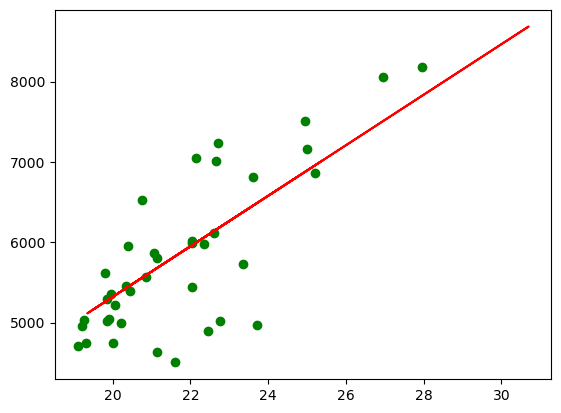

In [21]:
# plot actual point

plt.scatter(X_train, y_train,color='g')

# plot our linear model

plt. plot(X_test, 314.42228657 * X_test - 967.9138771227513, color='r')

# Now we will check the Residual
##### first, we make a DataFrame and calculate Residual based on our model


In [22]:
# DataFrame for high temperature range
Evaluation_high = pd.DataFrame(y_test)

In [23]:
# we re going to make a datafram for evaluation based on our model prediction and actual demand, we calculate residual and
# error percentage
Evaluation_high['Predict_Demand'] = 314.42228657 * X_test - 967.9138771227513
Evaluation_high['Residual'] = Evaluation_high['Predict_Demand'] - Evaluation_high['Max_Demand']
Evaluation_high['Error_percentage'] = Evaluation_high['Residual']/Evaluation_high['Max_Demand']*100
Evaluation_high.head()

Max_Demand  Predict_Demand    Residual  Error_percentage
74     5765.54     5367.695197 -397.844803         -6.900391
44     5719.51     5163.320711 -556.189289         -9.724422
21     6220.45     5540.627455 -679.822545        -10.928832
48     7804.22     7018.412202 -785.807798        -10.069011
75     5691.57     5116.157368 -575.412632        -10.109910

In [24]:
# adding average temperature
model_high_df = pd.merge(X_test,Evaluation_high, left_index=True,right_index=True, how='inner')

In [25]:
model_high_df.head()

Average temperature (°C)  Max_Demand  Predict_Demand    Residual  \
74                     20.15     5765.54     5367.695197 -397.844803   
44                     19.50     5719.51     5163.320711 -556.189289   
21                     20.70     6220.45     5540.627455 -679.822545   
48                     25.40     7804.22     7018.412202 -785.807798   
75                     19.35     5691.57     5116.157368 -575.412632   

    Error_percentage  
74         -6.900391  
44         -9.724422  
21        -10.928832  
48        -10.069011  
75        -10.109910

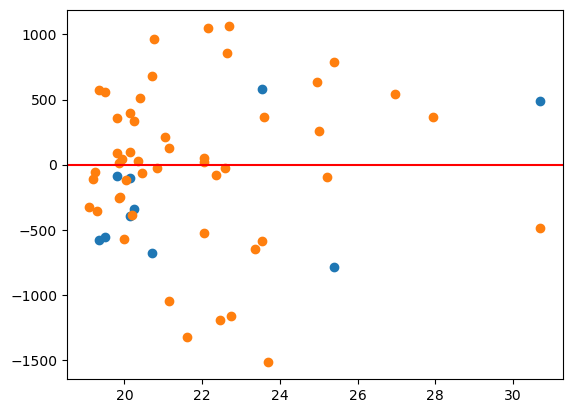

In [26]:
# Scatter plot for prediction(blue point) and other data
plt.scatter(model_high_df['Average temperature (°C)'],model_high_df['Residual'])
plt.scatter(result2['Average temperature (°C)'],result2['Max_Demand']-314.42228657 * result2['Average temperature (°C)'] + 967.9138771227513)


plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# To Improve our model:


## 1 - There is an issue in our data which is important: weather is for Melbourne, but demand is based on Victoria. Both should be for same region, if both data were about Melbourne, we might be able to find accurate model

## 2 - we need more data, having at least data for a full year

## 3 - To improve our model, it is better considered holidays and weekends as lots of business not working in these dates.

## In second file we will find a model for price category based on weather data, '3_second_model'